In [1]:
import os
import zipfile

In [2]:
with zipfile.ZipFile('2021_SPORT_v2025.zip', 'r') as zip_ref:
    zip_ref.extractall('2021_SPORT_v2025')

In [4]:
file_paths = []
for root, dirs, files in os.walk('2021_SPORT_v2025'):
    for file in files:
        if file.endswith('.txt'):
            file_paths.append(os.path.join(root, file))

In [5]:
file_paths

['2021_SPORT_v2025/3/26.txt',
 '2021_SPORT_v2025/3/71.txt',
 '2021_SPORT_v2025/3/89.txt',
 '2021_SPORT_v2025/3/22.txt',
 '2021_SPORT_v2025/3/74.txt',
 '2021_SPORT_v2025/3/6.txt',
 '2021_SPORT_v2025/3/56.txt',
 '2021_SPORT_v2025/3/78.txt',
 '2021_SPORT_v2025/3/92.txt',
 '2021_SPORT_v2025/3/19.txt',
 '2021_SPORT_v2025/3/68.txt',
 '2021_SPORT_v2025/3/55.txt',
 '2021_SPORT_v2025/3/36.txt',
 '2021_SPORT_v2025/3/24.txt',
 '2021_SPORT_v2025/3/93.txt',
 '2021_SPORT_v2025/3/64.txt',
 '2021_SPORT_v2025/3/10.txt',
 '2021_SPORT_v2025/3/33.txt',
 '2021_SPORT_v2025/3/96.txt',
 '2021_SPORT_v2025/3/79.txt',
 '2021_SPORT_v2025/3/84.txt',
 '2021_SPORT_v2025/3/86.txt',
 '2021_SPORT_v2025/3/43.txt',
 '2021_SPORT_v2025/3/30.txt',
 '2021_SPORT_v2025/3/100.txt',
 '2021_SPORT_v2025/3/31.txt',
 '2021_SPORT_v2025/3/99.txt',
 '2021_SPORT_v2025/3/20.txt',
 '2021_SPORT_v2025/3/77.txt',
 '2021_SPORT_v2025/3/39.txt',
 '2021_SPORT_v2025/3/3.txt',
 '2021_SPORT_v2025/3/51.txt',
 '2021_SPORT_v2025/3/46.txt',
 '2021_SPOR

In [6]:
!pip install pymorphy3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 58.7 MB/s eta 0:00:00


In [7]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import pymorphy3

In [8]:
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [9]:
morph = pymorphy3.MorphAnalyzer()
stop_words = set(stopwords.words('russian'))

In [10]:
def preprocess_text(text):
    tokens = word_tokenize(text, language='russian')
    tokens = [token.lower() for token in tokens if token.isalpha()]
    tokens = [token for token in tokens if token not in stop_words]
    lemmas = [morph.parse(token)[0].normal_form for token in tokens]
    return ' '.join(lemmas)

In [11]:
corpus = []
doc_names = []

for file_path in file_paths:
    with open(file_path, 'r', encoding='utf-8') as f:
        text = f.read()
    processed_text = preprocess_text(text)
    corpus.append(processed_text)
    doc_names.append(file_path)

In [12]:
corpus

['рфс игра зенит локо неуважительный отношение болельщик гостевой команда омрачать чемпионский праздник рфс выступить заявление повод ситуация болельщик локомотив сложиться игра тур рпл московский клуб зенит российский футбольный союз внимательно следить проверка аспект организация матч зенит локомотив который проводить российский надеяться рпл изучить факт перечисленный заявление фк локомотив сложиться ситуация получить оценка близкий комитет безопасность работа болельщик рфс быть пригласить представитель служба безопасность фк зенит мвд считать неуважительный отношение болельщик гостевой команда недопустимо омрачать чемпионский праздник нивелировать усилие фк зенит подготовка такой важный событие наш общий задача создавать максимально комфортный условие болельщик который приходить стадион рфс готовый оказать максимальный поддержка весь участник процесс организация матч такой ситуация повторяться сказать заявление',
 'актёр баринов поражение локомотив зенит сёмин такой счёт проиграть 

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [20]:
def create_vectors_tf_idf(corpus, n_features):
    tfidf_vectorizer = TfidfVectorizer(max_features=n_features)
    tfidf = tfidf_vectorizer.fit_transform(corpus)
    return tfidf_vectorizer, tfidf

In [21]:
def create_vectors_count(corpus, n_features):
    tf_vectorizer = CountVectorizer(max_features=n_features)
    tf = tf_vectorizer.fit_transform(corpus)
    return tf_vectorizer, tf

In [25]:
def plot_top_words(model, feature_names, n_top_words, title):
    n_topics = model.components_.shape[0]
    n_cols = 5
    n_rows = (n_topics + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(30, 15), sharex=True)
    axes = axes.flatten()

    for topic_idx, topic in enumerate(model.components_):
        top_indices = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_indices]
        weights = topic[top_indices]
        ax = axes[topic_idx]
        ax.barh(top_features, weights, color='navy')
        ax.set_title(f'Тема {topic_idx + 1}', fontdict={'fontsize': 15})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=12)
        for i, w in enumerate(weights):
            ax.text(w, i, f" {w:.2f}", color='black', fontweight='bold')

    for j in range(topic_idx + 1, len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle(title, fontsize=20)
    plt.subplots_adjust(top=0.90, wspace=0.3, hspace=0.3)
    plt.show()

In [30]:
n_features = 1000
n_components = 10
n_top_words = 20

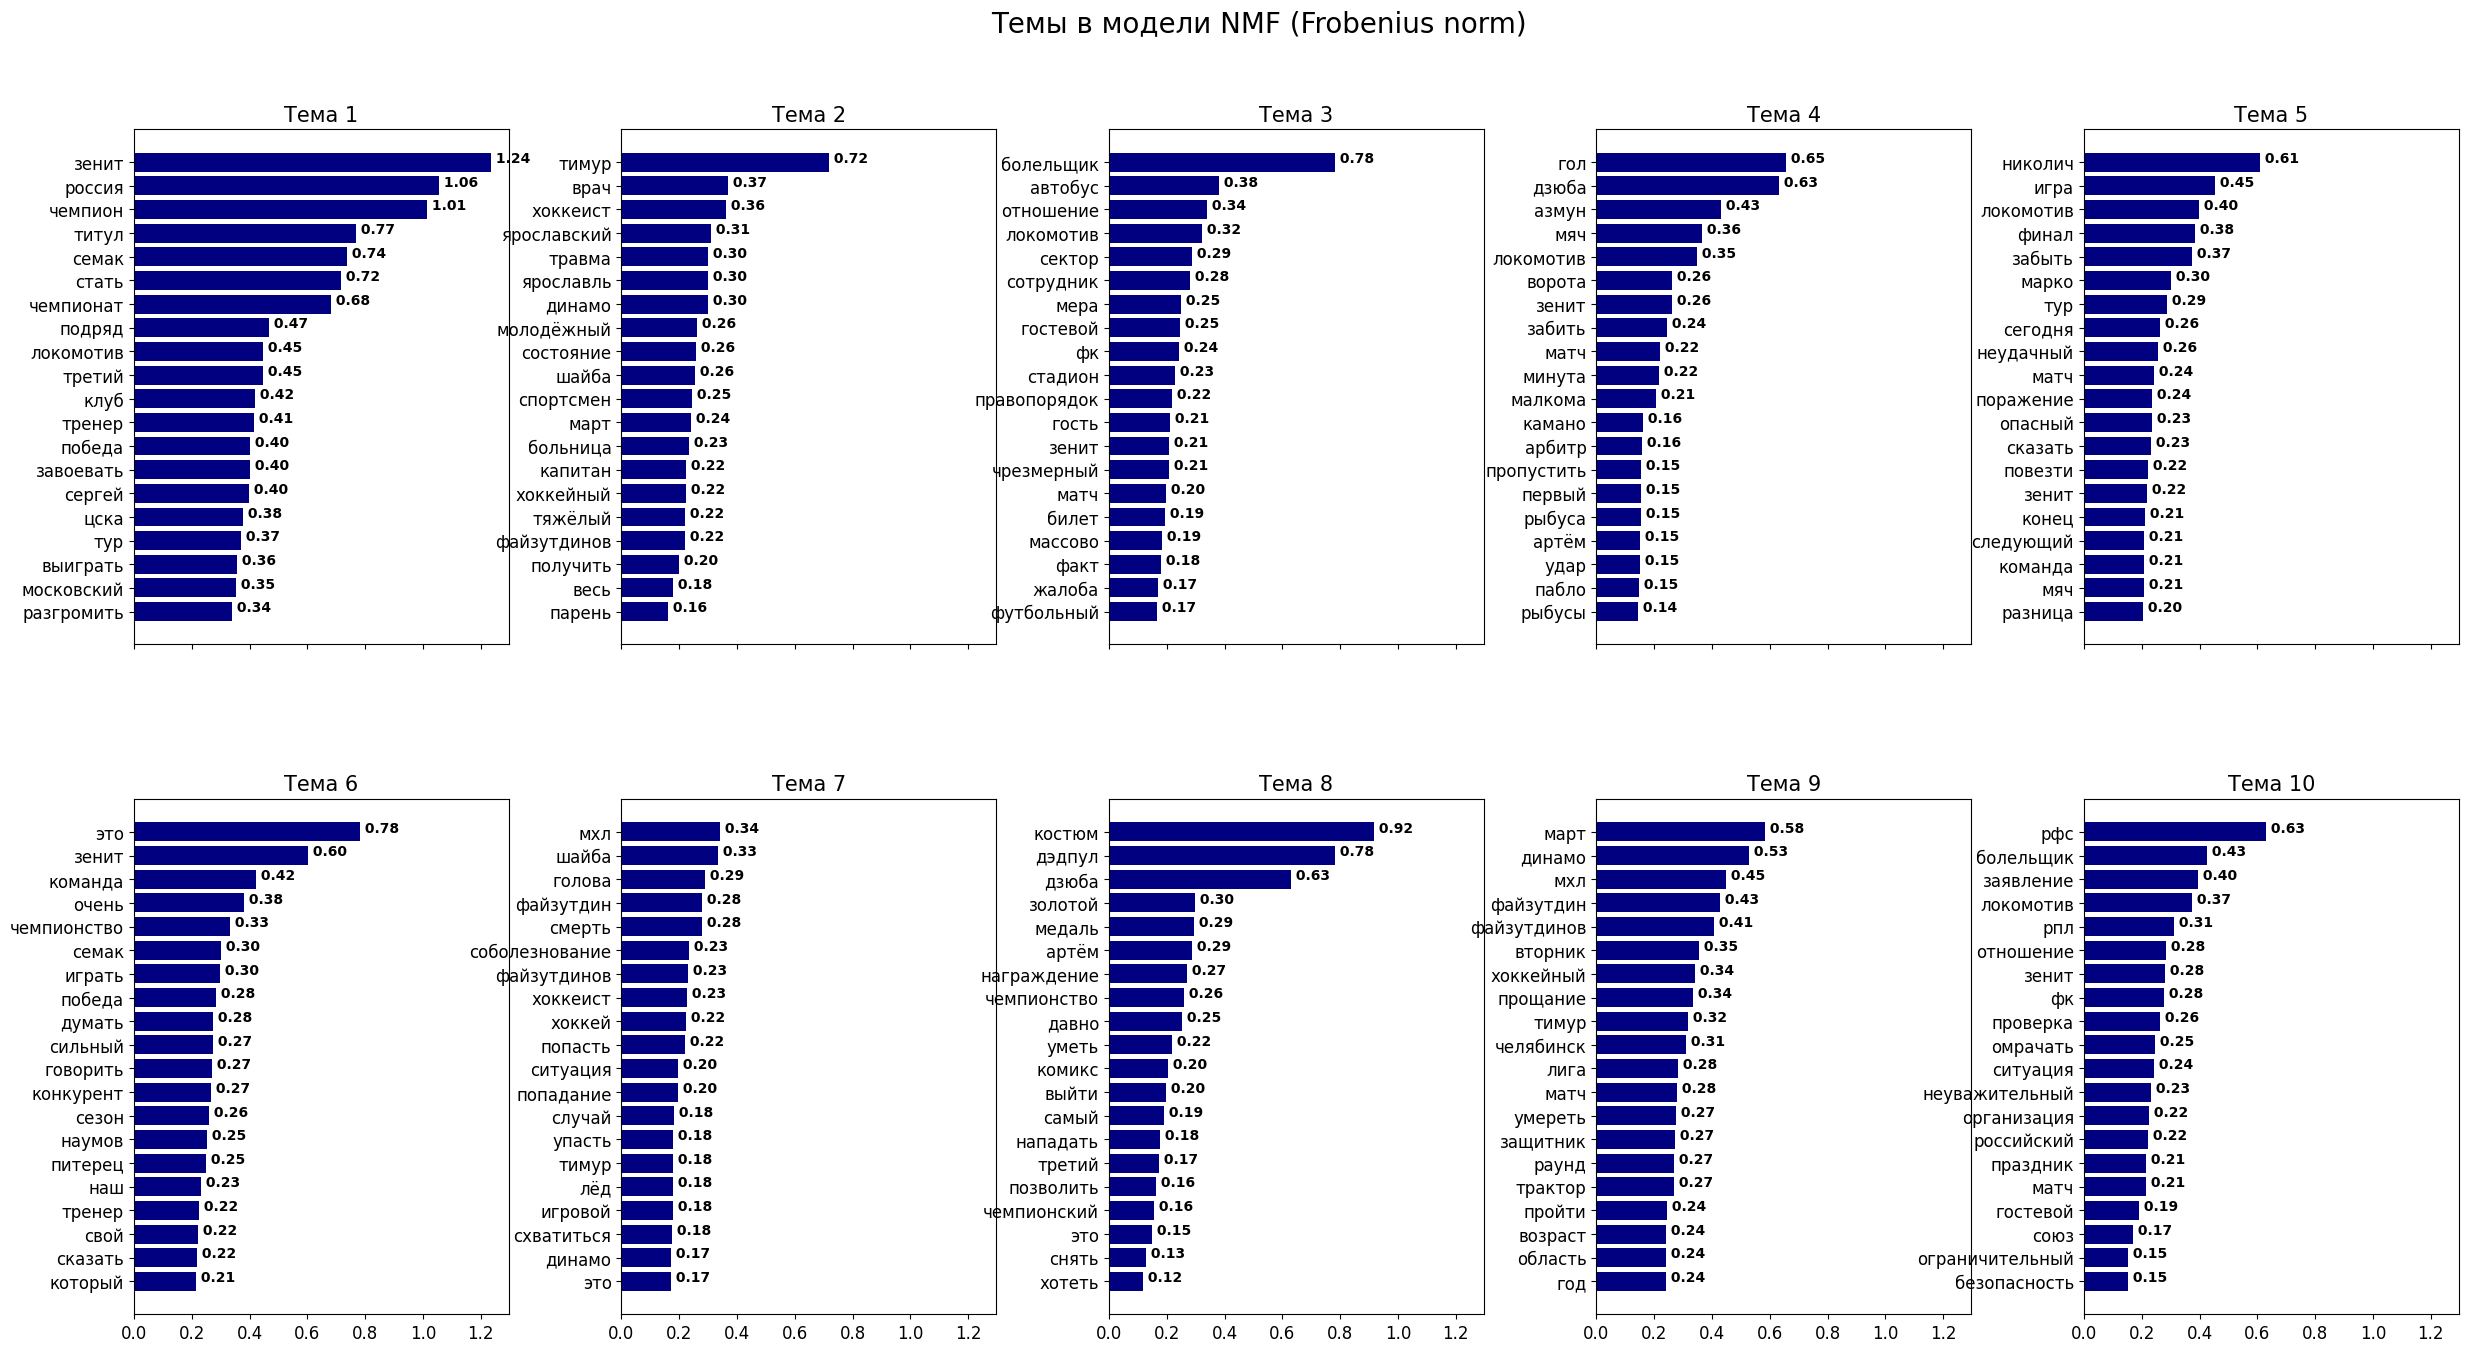

In [36]:
# TF-IDF векторизация и модель NMF
tfidf_vectorizer, tfidf = create_vectors_tf_idf(corpus, n_features=n_features)
nmf = NMF(n_components=n_components, random_state=1)
nmf.fit(tfidf)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(nmf, tfidf_feature_names, n_top_words, 'Темы в модели NMF (Frobenius norm)')

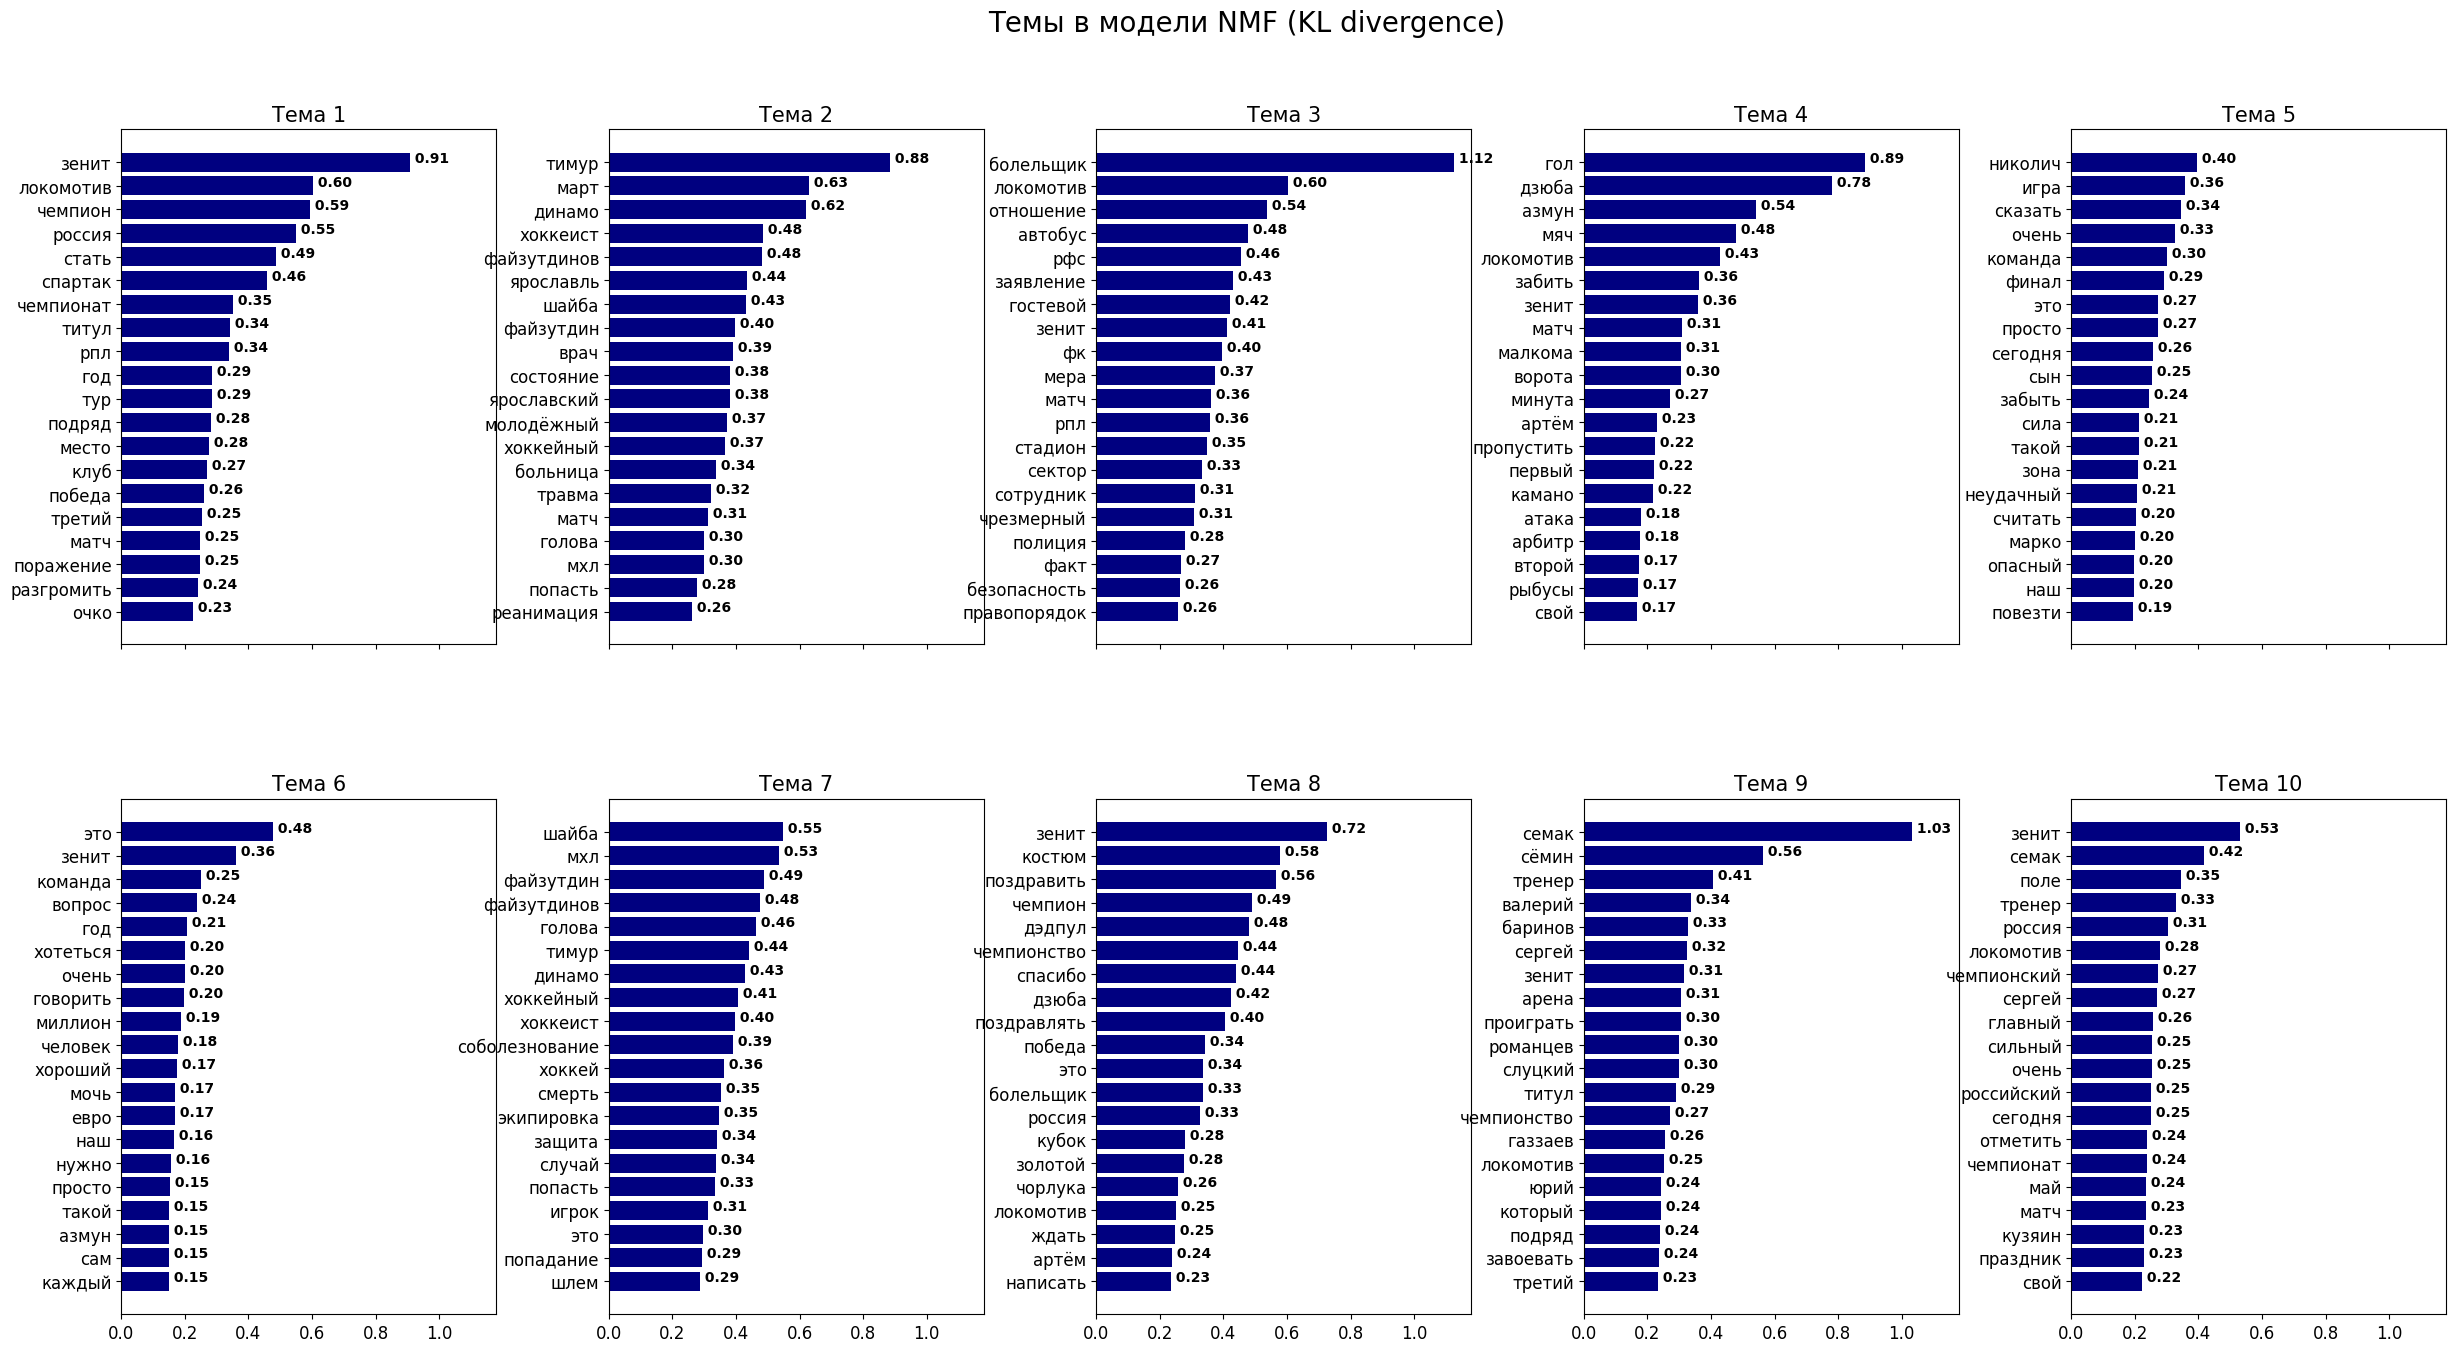

In [38]:
# Модель NMF с дивергенцией Кульбака-Лейблера
nmf_k = NMF(n_components=n_components, random_state=1, beta_loss='kullback-leibler',
            solver='mu', max_iter=1000)
nmf_k.fit(tfidf)
plot_top_words(nmf_k, tfidf_feature_names, n_top_words, 'Темы в модели NMF (KL divergence)')

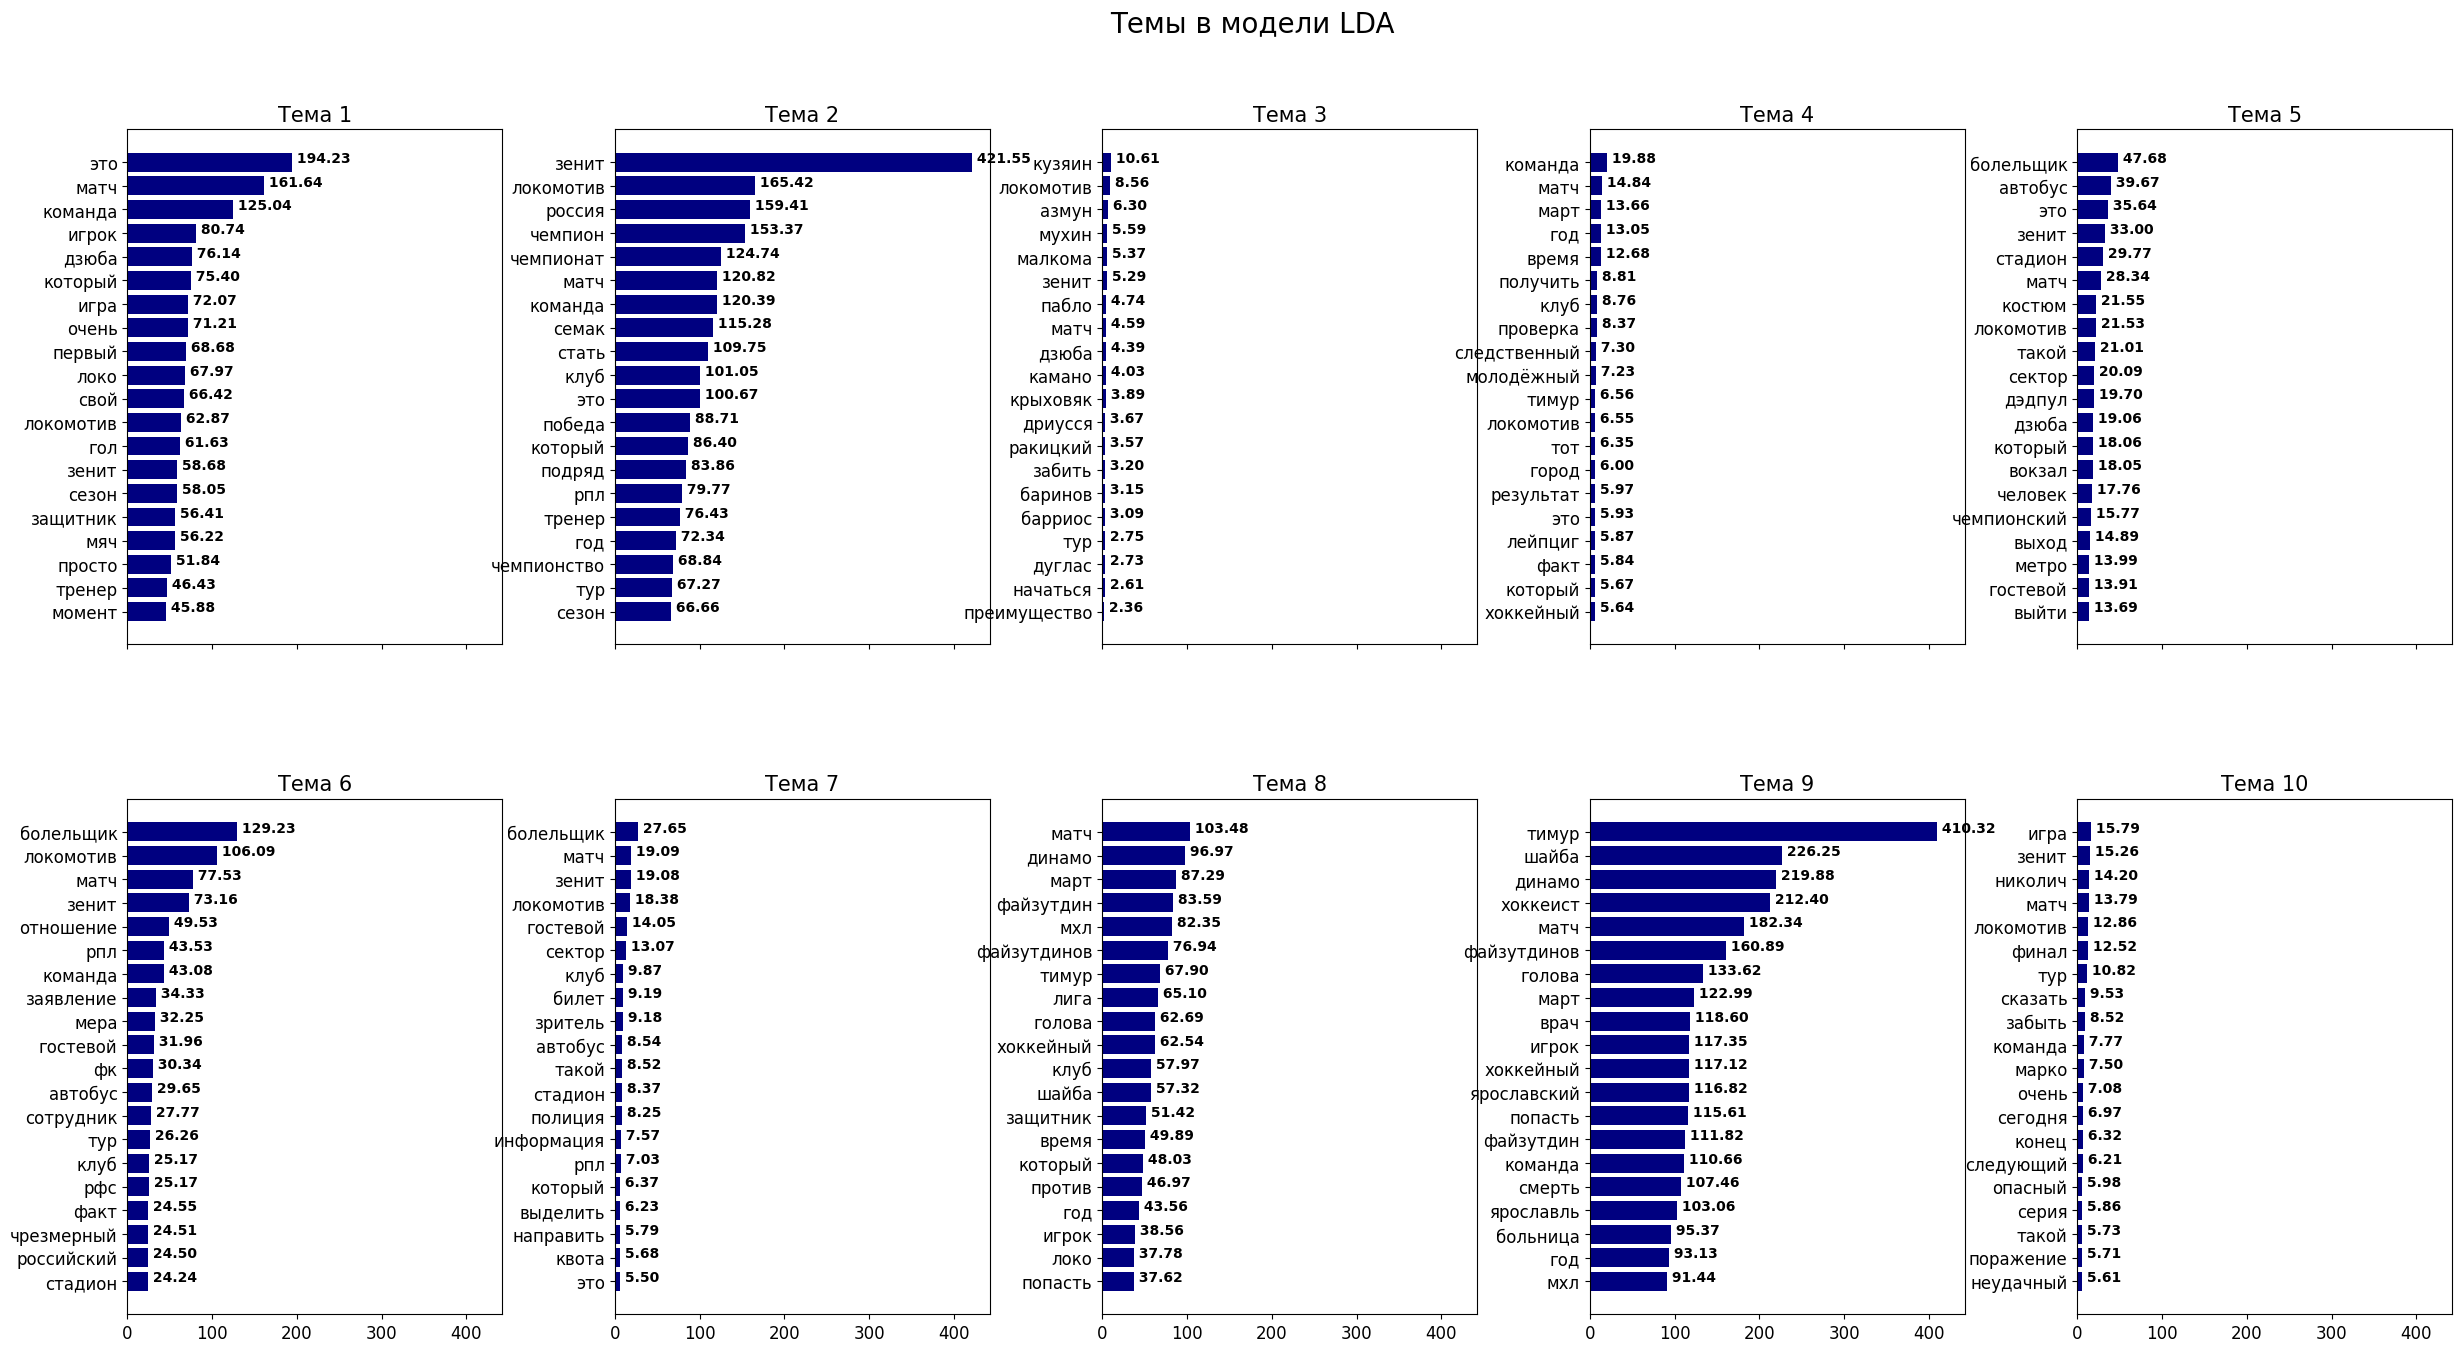

In [42]:
# CountVectorizer векторизация и модель LDA
tf_vectorizer, tf = create_vectors_count(corpus, n_features=n_features)
lda = LatentDirichletAllocation(n_components=n_components, max_iter=5, learning_method='online')
lda.fit(tf)
tf_feature_names = tf_vectorizer.get_feature_names_out()
plot_top_words(lda, tf_feature_names, n_top_words, 'Темы в модели LDA')